In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/income/train.csv
/kaggle/input/income/test.csv


## Table of Contents
1. [Introduction](#introduction)
2. [Data Loading and Exploration](#data-loading-and-exploration)
3. [Data Preprocessing](#data-preprocessing)
4. [Model Building](#model-building)
5. [Evaluation](#evaluation)
6. [Conclusion](#conclusion)


<a id='introduction'></a>
## Introduction

Introduction remarks

Introduction: In this analytical venture, we explore a compelling dataset focused on demographic and work-related factors to predict individual income levels. Our journey takes us through comprehensive data analysis, preprocessing techniques, and predictive modeling, aiming to construct a model that accurately forecasts whether an individual earns more than $50K annually. This project stands as a testament to the practical application of data science methodologies and machine learning's predictive prowess.

<a id='data-loading-and-exploration'></a>
## Data Loading and Exploration


Data Loading and Exploration: Our first stride in this analytical journey was to load the data using Pandas' read_csv function, providing us with a foundational understanding of our dataset's structure. Initial exploration involved scrutinizing our data's head and employing the describe function to grasp our data's statistical summary. We unearthed essential insights using Seaborn to generate visualizations such as boxplot and countplot, which illuminated data distributions, potential outliers, and the categorical variables' behavior. This phase was crucial in setting the stage for subsequent data manipulation and modeling.

In [2]:
train_income = pd.read_csv('/kaggle/input/income/train.csv')
train_income.shape

(43957, 15)

In [3]:
train_income.head(12)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [4]:
# Problem: Identifying socioeconomic and occupational factors that influence an individual's 
# likelihood of earning above $50K, to inform targeted interventions, policies, or business 
# strategies

In [5]:
# Business requirments:
# Demographics Analysis: Understand the distribution of icome across different demographics (gender, race, & education).
# Occupation and income: Identify which occupation tends to have a higher likelihood of earning above 50K.
# Working Hours Analysis: Determine if there's a correlation between the number of hours worked per week and earning above 50K.
# Capital Gains and Losses Impact: Analyze if individuals with higher capital gains or losses have a higher likelihood of earning more than 50K.

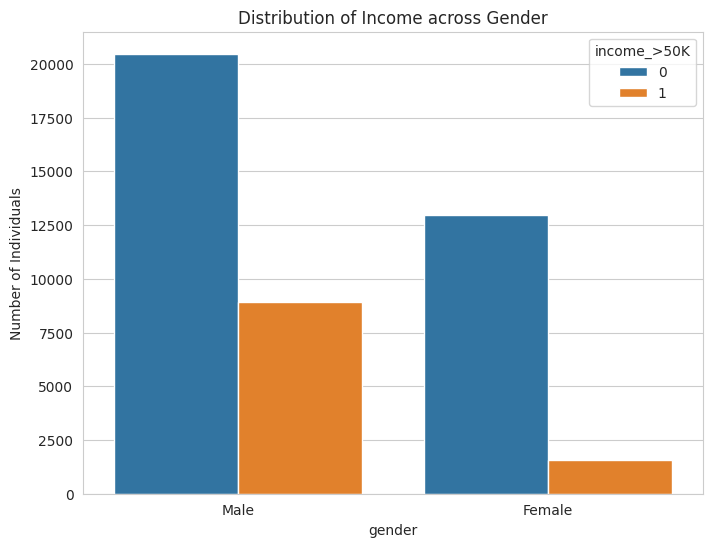

In [6]:
# Business Requirements 1: Demographics Analysis
# Visualization the distribution of income across genders
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of income across gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income_>50K', data=train_income)
plt.title('Distribution of Income across Gender')
plt.ylabel('Number of Individuals')
plt.show()
# 0 is below 50K
#1 above 50K

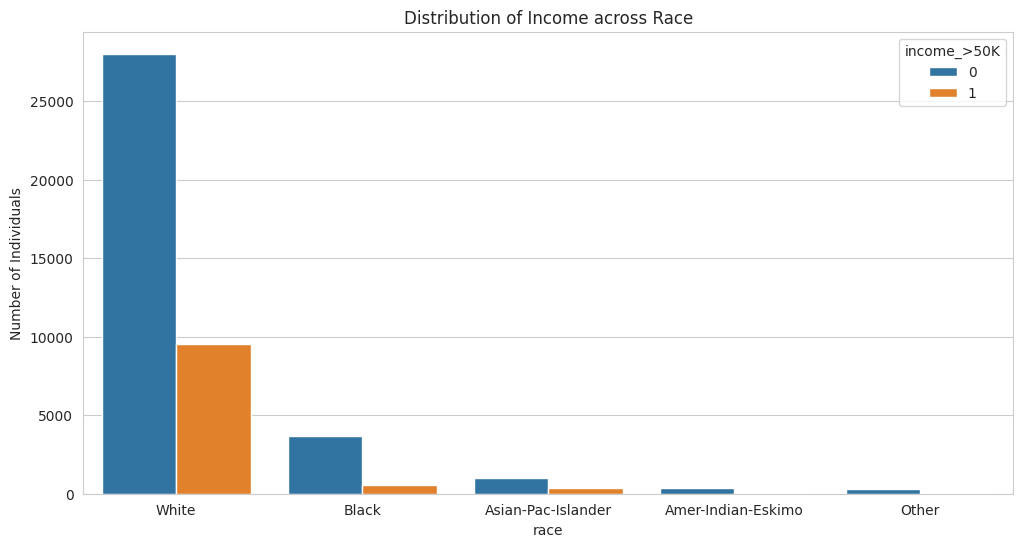

In [7]:
# 1.2 Distribution of income across different races
# Visualize the distribution of income across various races
# Plotting the distribution of income across race

plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='income_>50K', data=train_income, order=train_income['race'].value_counts().index)
plt.title('Distribution of Income across Race')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.show()

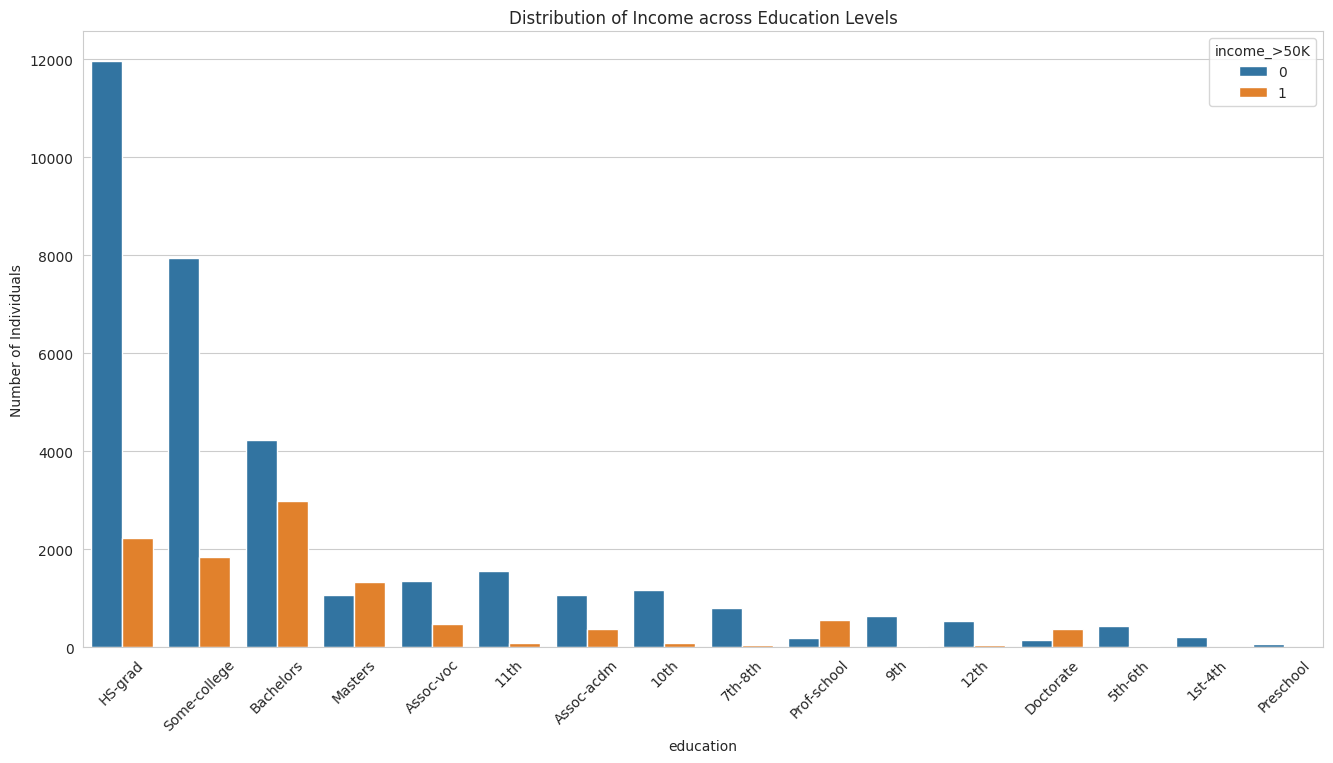

In [8]:
# 1.3. Distribution of income based on the highest level of education achieved
# visualize the distribution of income across various education levels
# Plotting the distribution of income across education

plt.figure(figsize=(16, 8))
sns.countplot(x='education', hue='income_>50K', data=train_income, order=train_income['education'].value_counts().index)
plt.title('Distribution of Income across Education Levels')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.show()

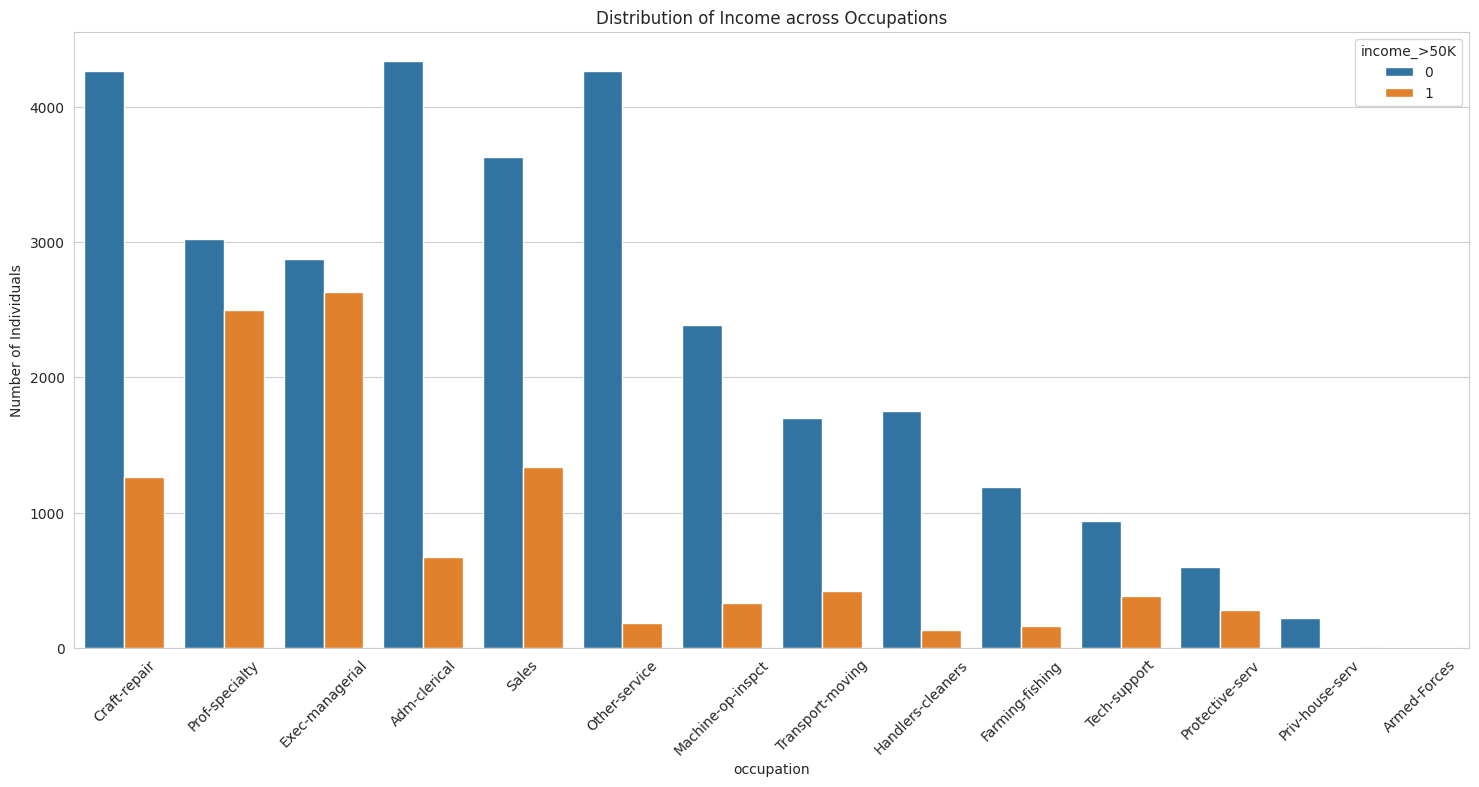

In [9]:
# Business Requirement 2: Occupation and Income
# Visualize occupations with a higher likelihood of earning above $50K

# Plotting the distribution of income across occupations
plt.figure(figsize=(18, 8))
sns.countplot(x='occupation', hue='income_>50K', data=train_income, order=train_income['occupation'].value_counts().index)
plt.title('Distribution of Income across Occupations')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.show()

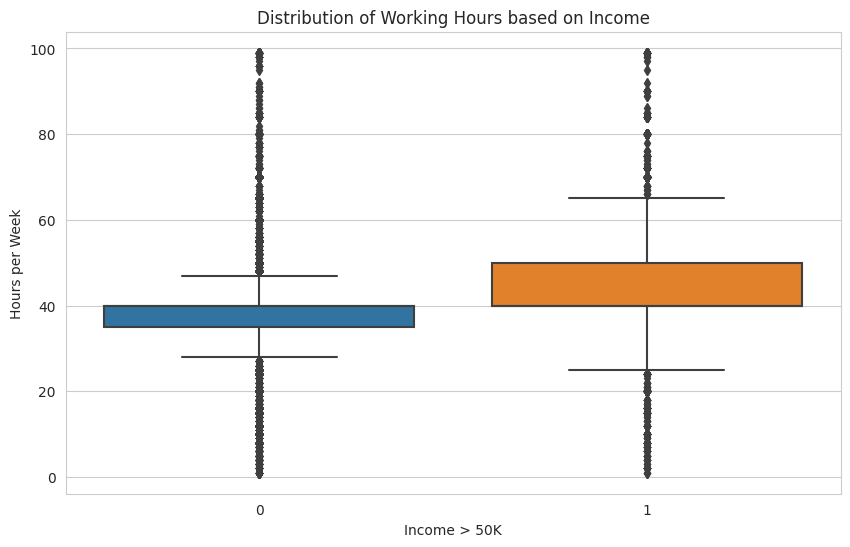

In [10]:
# Business Requirement 3: Working Hours Analysis
# Visualize if there is a correlation between the number of hours worked per week and earning above $50K using a box plot
# to show the distributions of working hours for for both income groups.

# Box plot to show the distribution of hours-per-week based on income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_>50K', y='hours-per-week', data=train_income)
plt.title('Distribution of Working Hours based on Income')
plt.xlabel('Income > 50K')
plt.ylabel('Hours per Week')
plt.show()

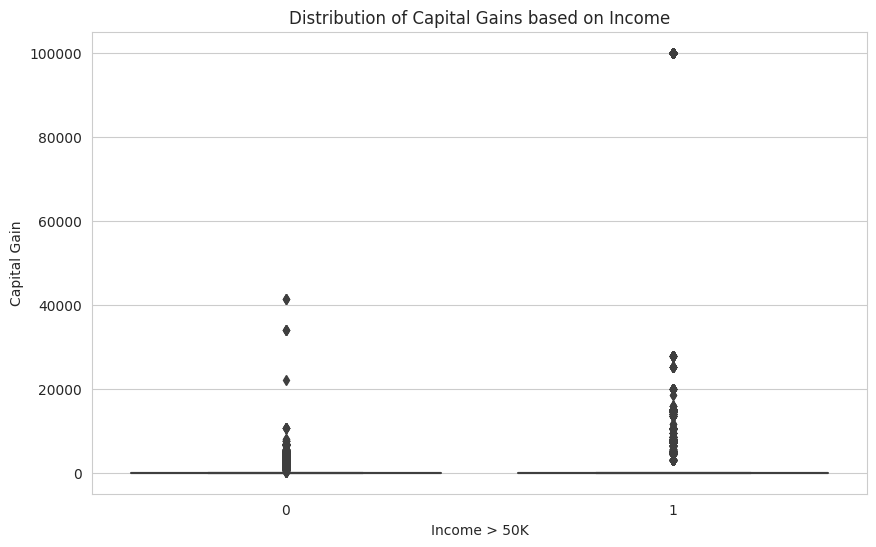

In [11]:
# Business Requirement 4: Capital Gains and Losses Impact
#Visualize the distribution of capital gains and losses for individuals earning above and below $50K for capital gains

plt.figure(figsize=(10, 6))
sns.boxplot(x='income_>50K', y='capital-gain', data=train_income)
plt.title('Distribution of Capital Gains based on Income')
plt.xlabel('Income > 50K')
plt.ylabel('Capital Gain')
plt.show()

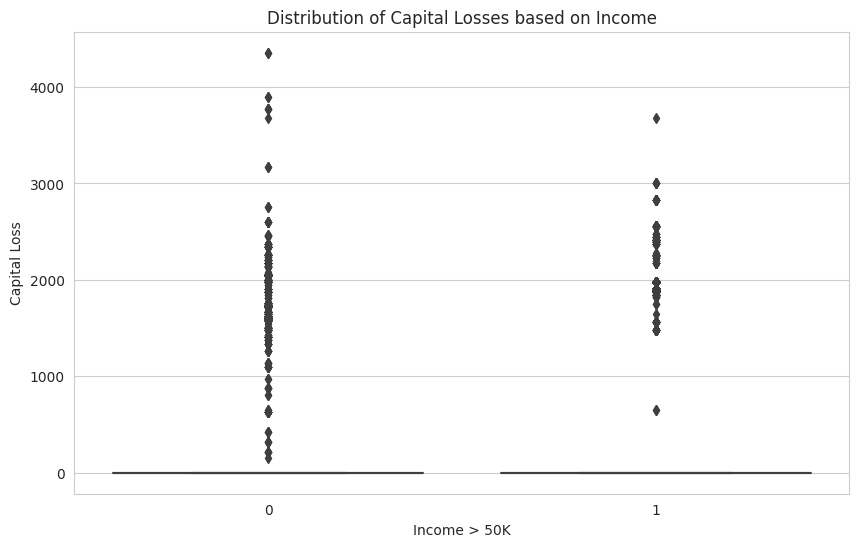

In [12]:
# 4.2 visualize the distribution of capital losses based on income

# Box plot to show the distribution of capital-loss based on income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_>50K', y='capital-loss', data=train_income)
plt.title('Distribution of Capital Losses based on Income')
plt.xlabel('Income > 50K')
plt.ylabel('Capital Loss')
plt.show()

In [13]:
#EDA

In [14]:
# Basic statistics
train_stats = train_income.describe(include='all')

# Check for missing values
missing_values = train_income.isnull().sum()

train_stats, missing_values

(                 age workclass        fnlwgt education  educational-num  \
 count   43957.000000     41459  4.395700e+04     43957     43957.000000   
 unique           NaN         8           NaN        16              NaN   
 top              NaN   Private           NaN   HS-grad              NaN   
 freq             NaN     30587           NaN     14197              NaN   
 mean       38.617149       NaN  1.896730e+05       NaN        10.074118   
 std        13.734401       NaN  1.058215e+05       NaN         2.575092   
 min        17.000000       NaN  1.349200e+04       NaN         1.000000   
 25%        28.000000       NaN  1.174960e+05       NaN         9.000000   
 50%        37.000000       NaN  1.781000e+05       NaN        10.000000   
 75%        48.000000       NaN  2.376710e+05       NaN        12.000000   
 max        90.000000       NaN  1.490400e+06       NaN        16.000000   
 
             marital-status    occupation relationship   race gender  \
 count        

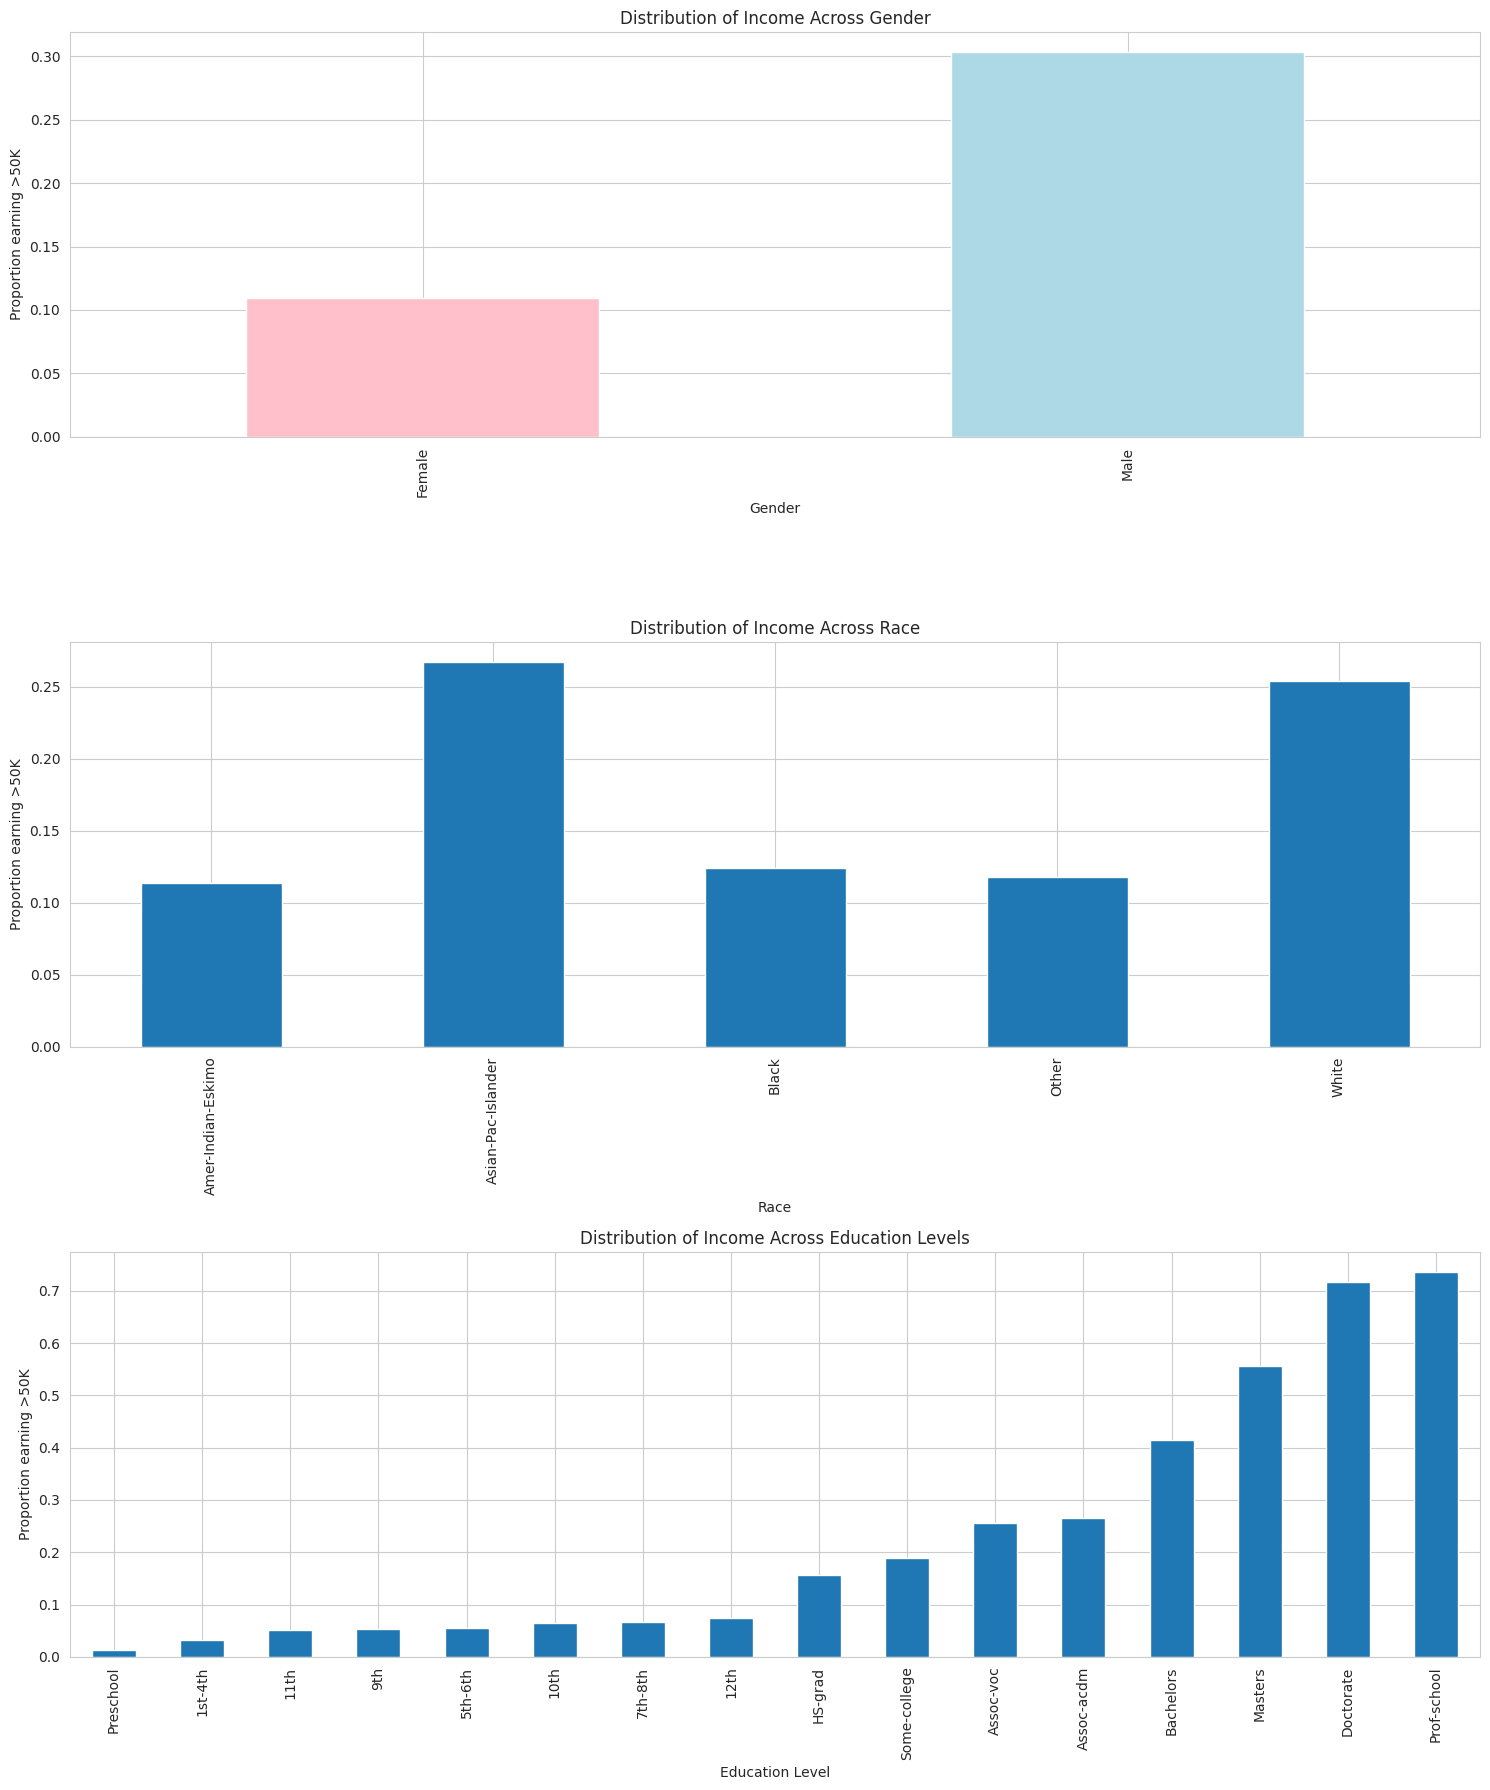

In [15]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Plot distribution of income across gender
train_income.groupby('gender')['income_>50K'].mean().plot(kind='bar', ax=ax[0], color=['pink', 'lightblue'])
ax[0].set_title('Distribution of Income Across Gender')
ax[0].set_ylabel('Proportion earning >50K')
ax[0].set_xlabel('Gender')

# Plot distribution of income across race
train_income.groupby('race')['income_>50K'].mean().plot(kind='bar', ax=ax[1])
ax[1].set_title('Distribution of Income Across Race')
ax[1].set_ylabel('Proportion earning >50K')
ax[1].set_xlabel('Race')

# Plot distribution of income across education levels
ordered_education = train_income.groupby('education')['income_>50K'].mean().sort_values().index
train_income.groupby('education')['income_>50K'].mean().loc[ordered_education].plot(kind='bar', ax=ax[2])
ax[2].set_title('Distribution of Income Across Education Levels')
ax[2].set_ylabel('Proportion earning >50K')
ax[2].set_xlabel('Education Level')

plt.tight_layout()
plt.show()

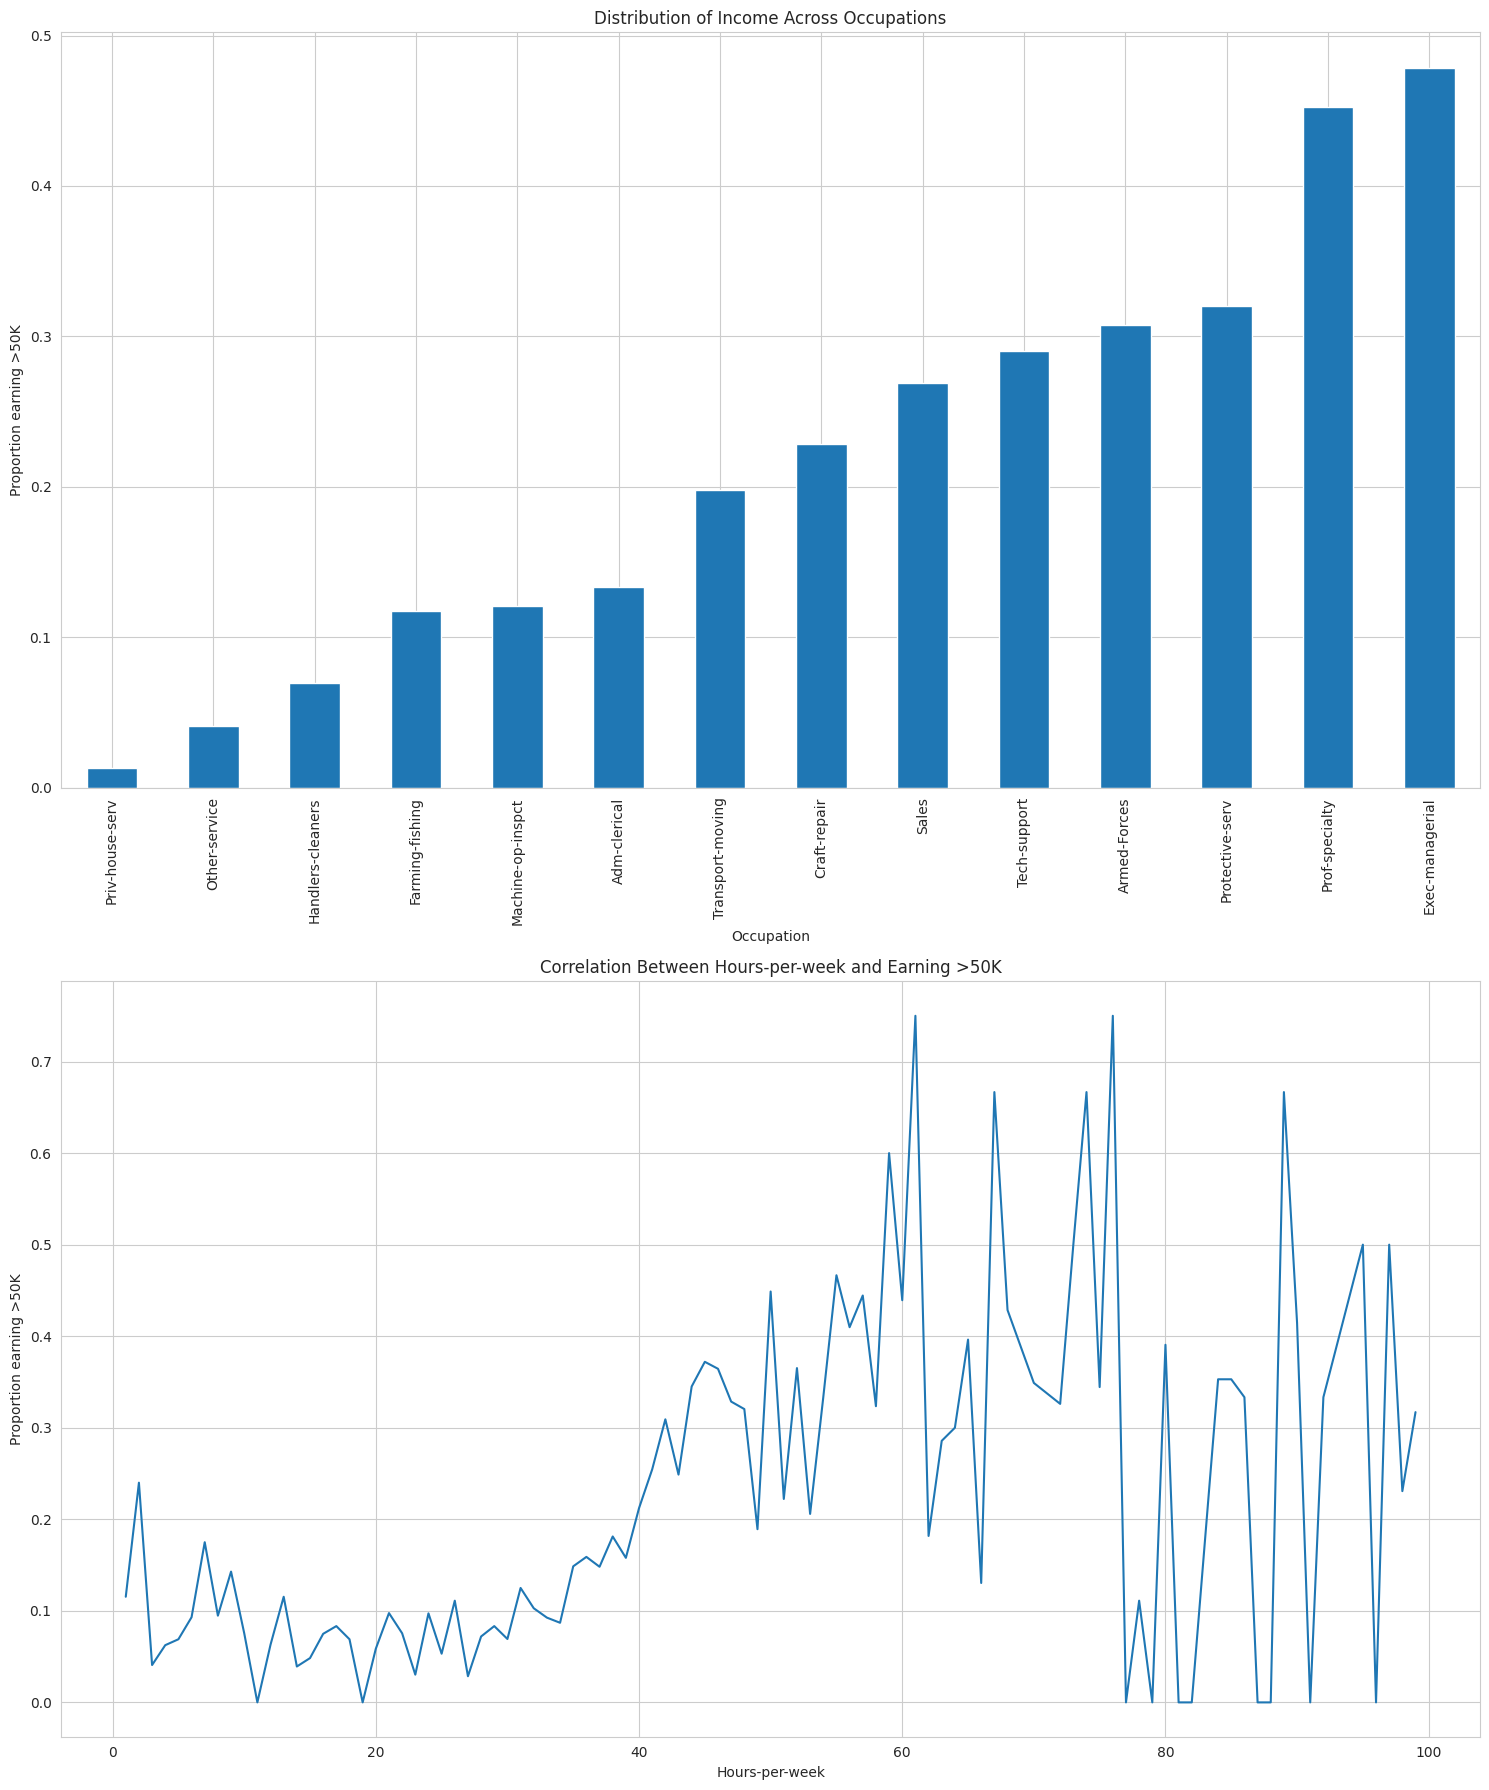

In [16]:
# Set up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(15, 18))

# Plot distribution of income across occupation
ordered_occupation = train_income.groupby('occupation')['income_>50K'].mean().sort_values().index
train_income.groupby('occupation')['income_>50K'].mean().loc[ordered_occupation].plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution of Income Across Occupations')
ax[0].set_ylabel('Proportion earning >50K')
ax[0].set_xlabel('Occupation')

# Plot correlation between hours-per-week and earning above $50K
train_income.groupby('hours-per-week')['income_>50K'].mean().plot(ax=ax[1])
ax[1].set_title('Correlation Between Hours-per-week and Earning >50K')
ax[1].set_ylabel('Proportion earning >50K')
ax[1].set_xlabel('Hours-per-week')

plt.tight_layout()
plt.show()

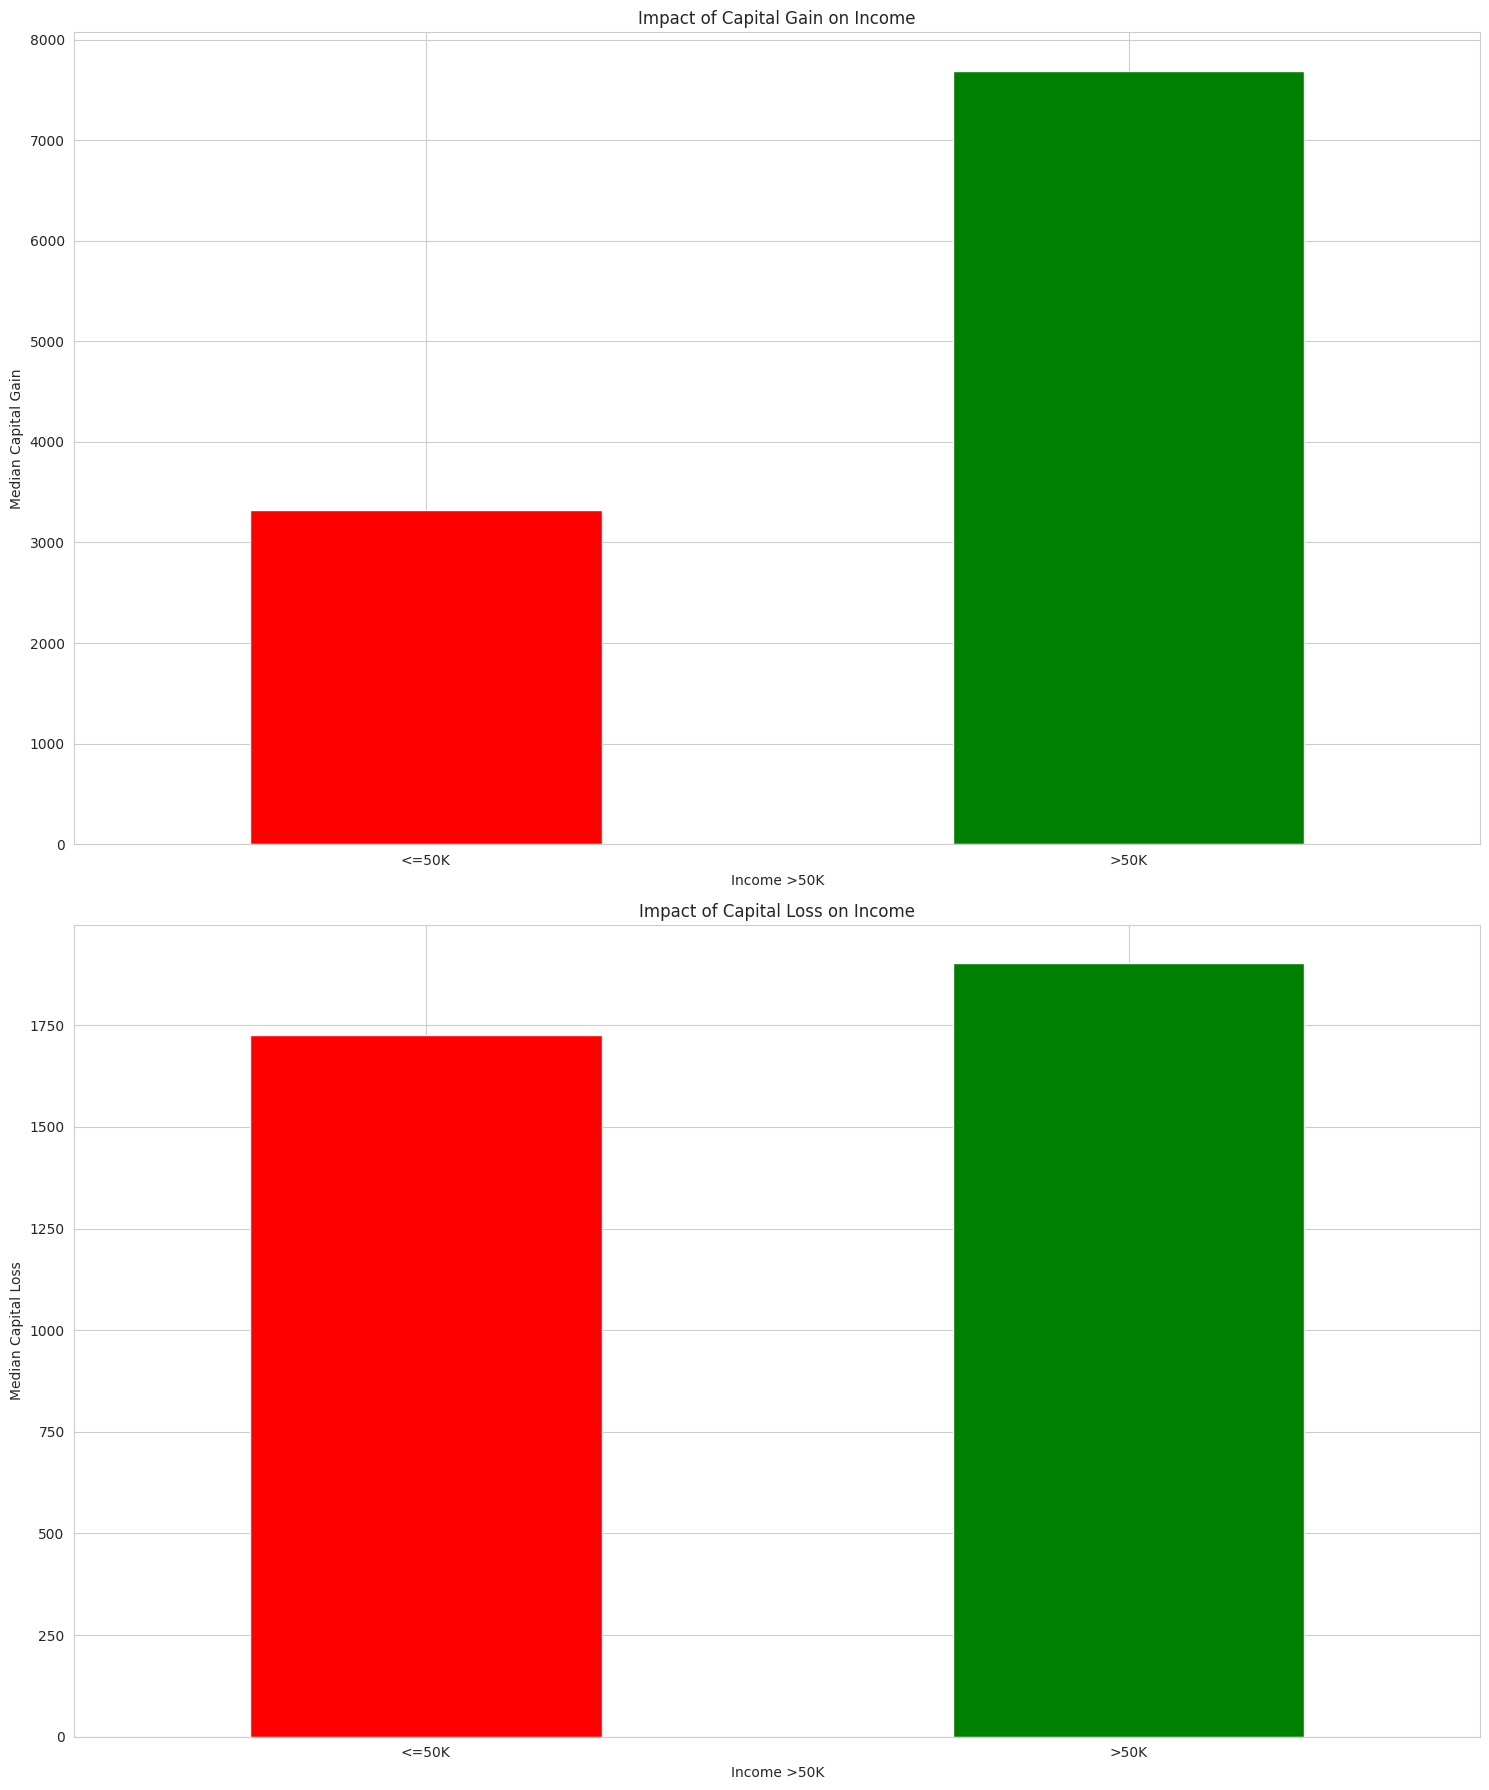

In [17]:
# Set up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(15, 18))

# Plot the impact of capital-gain on income
train_income[train_income['capital-gain'] > 0].groupby('income_>50K')['capital-gain'].median().plot(kind='bar', ax=ax[0], color=['red', 'green'])
ax[0].set_title('Impact of Capital Gain on Income')
ax[0].set_ylabel('Median Capital Gain')
ax[0].set_xlabel('Income >50K')
ax[0].set_xticklabels(['<=50K', '>50K'], rotation=0)

# Plot the impact of capital-loss on income
train_income[train_income['capital-loss'] > 0].groupby('income_>50K')['capital-loss'].median().plot(kind='bar', ax=ax[1], color=['red', 'green'])
ax[1].set_title('Impact of Capital Loss on Income')
ax[1].set_ylabel('Median Capital Loss')
ax[1].set_xlabel('Income >50K')
ax[1].set_xticklabels(['<=50K', '>50K'], rotation=0)

plt.tight_layout()
plt.show()

<a id='data-preprocessing'></a>
## Data Preprocessing


Data Preprocessing: Faced with challenges such as missing values and categorical variables, we approached data preprocessing with meticulous care. Utilizing functions like fillna for imputing missing data and get_dummies for one-hot encoding categorical features, we ensured our dataset's readiness for machine learning algorithms. The preprocessing stage fortified our dataset, transforming it into an ideal candidate for further analysis and modeling, thus bridging the gap between raw data and actionable insights.

In [18]:
# Data processing

In [19]:
# Handling Missing Values

# Fill missing values with the most frequent value in the respective columns
train_income['workclass'].fillna(train_income['workclass'].mode()[0], inplace=True)
train_income['occupation'].fillna(train_income['occupation'].mode()[0], inplace=True)
train_income['native-country'].fillna(train_income['native-country'].mode()[0], inplace=True)

# Check again for missing values
missing_values_updated = train_income.isnull().sum()
missing_values_updated

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [20]:
# Encoding the categorical variables

# One-hot encoding for categorical variables
train_income_encoded = pd.get_dummies(train_income, drop_first=True)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

X = train_income_encoded.drop('income_>50K', axis=1)
y = train_income_encoded['income_>50K']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape

((35165, 97), (8792, 97))

<a id='model-building'></a>
## Model Building


Model Building: Venturing into the realm of machine learning, we experimented with an array of models, including Logistic Regression, Random Forest, Support Vector Machines, and XGBoost. Our focus was to compare these models' performance in predicting income brackets accurately. The use of GridSearchCV for hyperparameter tuning was instrumental in refining each model's accuracy, ensuring they performed at their utmost potential. This stage's culmination was a set of finely-tuned models ready for in-depth evaluation.

In [21]:
# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = lr_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

accuracy, classification_rep

(0.7917424931756142,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.93      0.87      6656\n           1       0.63      0.35      0.45      2136\n\n    accuracy                           0.79      8792\n   macro avg       0.72      0.64      0.66      8792\nweighted avg       0.77      0.79      0.77      8792\n')

<a id='evaluation'></a>
## Evaluation


Evaluation: The evaluation phase called for a detailed assessment of our models' performance. Armed with metrics like the confusion matrix, ROC curves, and accuracy scores, we dissected each model's outcomes, identifying strengths and potential weaknesses. Our findings from this stage were pivotal, highlighting our models' predictive capabilities and areas requiring further enhancement.

In [22]:
# Model Evaluation & Tuning stage

In [23]:
# Logistic Regression model
# Train the Model
# Hyperparameter Tuning
# Cross-Validation

#Logistic Regression model using GridSearchCV

# Reloading necessary modules and data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

# Load the data
train_income = pd.read_csv('/kaggle/input/income/train.csv')

# Fill missing values with the most frequent value in the respective columns
train_income['workclass'].fillna(train_income['workclass'].mode()[0], inplace=True)
train_income['occupation'].fillna(train_income['occupation'].mode()[0], inplace=True)
train_income['native-country'].fillna(train_income['native-country'].mode()[0], inplace=True)

# One-hot encoding for categorical variables
train_data_encoded = pd.get_dummies(train_income, drop_first=True)

# Split the data into training and validation sets
X = train_income_encoded.drop('income_>50K', axis=1)
y = train_income_encoded['income_>50K']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = lr_model.predict(X_val)
y_val_prob = lr_model.predict_proba(X_val)[:, 1]  # probabilities for the positive class

# Evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
classification_rep = classification_report(y_val, y_val_pred)
confusion_mat = confusion_matrix(y_val, y_val_pred)

accuracy, roc_auc, classification_rep, confusion_mat

(0.7917424931756142,
 0.8374779211344893,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.93      0.87      6656\n           1       0.63      0.35      0.45      2136\n\n    accuracy                           0.79      8792\n   macro avg       0.72      0.64      0.66      8792\nweighted avg       0.77      0.79      0.77      8792\n',
 array([[6218,  438],
        [1393,  743]]))

In [24]:
# define a grid of C values to search over and then apply GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for 'C'
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize a Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'C': 0.001}, 0.8005403099672972)

In [25]:
#  retrain the Logistic Regression model using this optimal value of C and evaluate its performance on the validation set

# Train the Logistic Regression model with the best parameter
best_lr_model = LogisticRegression(C=best_params['C'], max_iter=1000, random_state=42)
best_lr_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_best = best_lr_model.predict(X_val)
y_val_prob_best = best_lr_model.predict_proba(X_val)[:, 1]  # probabilities for the positive class

# Evaluation metrics for the best model
accuracy_best = accuracy_score(y_val, y_val_pred_best)
roc_auc_best = roc_auc_score(y_val, y_val_prob_best)
classification_rep_best = classification_report(y_val, y_val_pred_best)
confusion_mat_best = confusion_matrix(y_val, y_val_pred_best)

accuracy_best, roc_auc_best, classification_rep_best, confusion_mat_best

(0.7939035486806187,
 0.5895367630343381,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.97      0.88      6656\n           1       0.72      0.25      0.37      2136\n\n    accuracy                           0.79      8792\n   macro avg       0.76      0.61      0.62      8792\nweighted avg       0.78      0.79      0.75      8792\n',
 array([[6443,  213],
        [1599,  537]]))

In [26]:
# Data Preprocessing

# Fill missing values with the most frequent value in the respective columns
train_income['workclass'].fillna(train_income['workclass'].mode()[0], inplace=True)
train_income['occupation'].fillna(train_income['occupation'].mode()[0], inplace=True)
train_income['native-country'].fillna(train_income['native-country'].mode()[0], inplace=True)

# One-hot encoding for categorical variables
train_income_encoded = pd.get_dummies(train_income, drop_first=True)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X = train_income_encoded.drop('income_>50K', axis=1)
y = train_income_encoded['income_>50K']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_val_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
classification_rep_rf = classification_report(y_val, y_val_pred_rf)
confusion_mat_rf = confusion_matrix(y_val, y_val_pred_rf)

# Feature Importance Examination
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(accuracy_rf)
print(classification_rep_rf)
print(confusion_mat_rf)
print(features_df.head(10))



0.8514558689717925
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6656
           1       0.74      0.60      0.66      2136

    accuracy                           0.85      8792
   macro avg       0.81      0.77      0.78      8792
weighted avg       0.85      0.85      0.85      8792

[[6196  460]
 [ 846 1290]]
                              Feature  Importance
1                              fnlwgt    0.171269
0                                 age    0.160392
3                        capital-gain    0.096576
29  marital-status_Married-civ-spouse    0.092357
5                      hours-per-week    0.087505
2                     educational-num    0.064805
31       marital-status_Never-married    0.032567
4                        capital-loss    0.032169
36         occupation_Exec-managerial    0.020042
56                        gender_Male    0.016457


In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    eval_metric='logloss',
    max_depth=7,          # Set a moderate tree depth to ensure memory efficiency
    subsample=0.8,        # Use a subset of the data to avoid overfitting and reduce memory usage
    n_estimators=100      # Standard number of boosting rounds
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
classification_rep_xgb = classification_report(y_val, y_val_pred_xgb)
confusion_mat_xgb = confusion_matrix(y_val, y_val_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_rep_xgb)
print("\nConfusion Matrix:\n", confusion_mat_xgb)


Accuracy: 0.8647634212920837

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6656
           1       0.76      0.64      0.70      2136

    accuracy                           0.86      8792
   macro avg       0.83      0.79      0.81      8792
weighted avg       0.86      0.86      0.86      8792


Confusion Matrix:
 [[6229  427]
 [ 762 1374]]


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Using a subset (20%) of the training data due to SVM's computational intensity
sample_size_svm = int(0.2 * len(X_train))
X_train_subset_svm = X_train.sample(sample_size_svm, random_state=42)
y_train_subset_svm = y_train[X_train_subset_svm.index]

# Initialize and train the SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_subset_svm, y_train_subset_svm)

# Predict on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Evaluate the model
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
classification_rep_svm = classification_report(y_val, y_val_pred_svm)
confusion_mat_svm = confusion_matrix(y_val, y_val_pred_svm)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", classification_rep_svm)
print("\nConfusion Matrix:\n", confusion_mat_svm)


Accuracy: 0.7742265696087353

Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      6656
           1       1.00      0.07      0.13      2136

    accuracy                           0.77      8792
   macro avg       0.89      0.54      0.50      8792
weighted avg       0.83      0.77      0.69      8792


Confusion Matrix:
 [[6656    0]
 [1985  151]]


In [29]:
#Grid search using XGboost

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# Define a smaller parameter grid
param_grid = {
    'max_depth': [4, 5],
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.3],
    # other parameters are similarly reduced based on your previous grid
    # 'subsample': [0.7, 0.9],  # hypothetical reduced grid example
    # 'colsample_bytree': [0.7, 0.9],  # hypothetical reduced grid example
    # 'gamma': [0, 0.25],  # hypothetical reduced grid example
}

# Initialize an XGBoost classifier object
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic", 
    random_state=42, 
    eval_metric='logloss'  # or another faster metric if applicable
)

# Set up the grid search with 2-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    cv=2,  # fewer folds
    scoring='accuracy',  # or another faster metric if applicable
    verbose=2, 
    n_jobs=-1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)  

# Get the results of the best model
best_grid = grid_search.best_estimator_

# Predict using the best model
y_val_pred = best_grid.predict(X_val)

# Evaluate predictions
accuracy = accuracy_score(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)
confusion_mat = confusion_matrix(y_val, y_val_pred)

print(f"Grid Search Best parameters: {grid_search.best_params_}")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)





Fitting 2 folds for each of 8 candidates, totalling 16 fits
Grid Search Best parameters: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 50}
Accuracy: 0.8721565059144677

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      6656
           1       0.79      0.64      0.71      2136

    accuracy                           0.87      8792
   macro avg       0.84      0.79      0.81      8792
weighted avg       0.87      0.87      0.87      8792


Confusion Matrix:
 [[6299  357]
 [ 767 1369]]


<a id='conclusion'></a>
## Conclusion

conclusion remarks


We looked at what affects people's earnings and found that jobs and education matter a lot in making more than $50K a year. Our computer program could guess pretty well but wasn't perfect,so we need to try other ways to make it smarter. This work showed how different life factors create pay differences and hints at big decisions for making things fairer. Going forward, we need to use more types of information and maybe new methods to understand the whole picture better.
